In [231]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [232]:
import numpy as np
import pandas as pd

In [233]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [234]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [235]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [236]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [237]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [238]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [239]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [240]:
# Find the last data point in the database

session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [241]:


# Take all of the data points since one year ago

target_dates = session.query(Measurement.date).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

target_prcp = session.query(Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

In [242]:
# Ensure all data is captures
# len(target_prcp)
# len(target_dates)

In [243]:
df = pd.DataFrame(target_dates) 
prcp_df = pd.DataFrame(target_prcp)

combined_df = pd.concat([df, prcp_df], axis=1)
parse_dates=['date']


combined_df

combined_df.groupby(['date', 'prcp']).sum()


Empty DataFrame
Columns: []
Index: [(2016-08-24, 0.08), (2016-08-24, 1.22), (2016-08-24, 1.45), (2016-08-24, 2.15), (2016-08-24, 2.28), (2016-08-25, 0.0), (2016-08-25, 0.06), (2016-08-25, 0.08), (2016-08-25, 0.11), (2016-08-25, 0.21), (2016-08-26, 0.0), (2016-08-26, 0.01), (2016-08-26, 0.02), (2016-08-26, 0.03), (2016-08-26, 0.04), (2016-08-27, 0.0), (2016-08-27, 0.02), (2016-08-27, 0.12), (2016-08-27, 0.18), (2016-08-28, 0.01), (2016-08-28, 0.14), (2016-08-28, 0.6), (2016-08-28, 2.07), (2016-08-29, 0.0), (2016-08-29, 0.04), (2016-08-29, 0.17), (2016-08-29, 0.35), (2016-08-29, 0.9), (2016-08-30, 0.0), (2016-08-30, 0.02), (2016-08-30, 0.05), (2016-08-31, 0.1), (2016-08-31, 0.13), (2016-08-31, 0.24), (2016-08-31, 0.25), (2016-08-31, 2.46), (2016-09-01, 0.0), (2016-09-01, 0.01), (2016-09-01, 0.02), (2016-09-02, 0.0), (2016-09-02, 0.01), (2016-09-02, 0.02), (2016-09-02, 0.03), (2016-09-02, 0.19), (2016-09-03, 0.0), (2016-09-03, 0.07), (2016-09-03, 0.08), (2016-09-03, 0.12), (2016-09-03, 1.0), (2016-09-04, 0.03), (2016-09-04, 0.14), (2016-09-04, 0.44), (2016-09-04, 0.74), (2016-09-05, 0.02), (2016-09-05, 0.03), (2016-09-05, 0.11), (2016-09-05, 0.18), (2016-09-06, 0.03), (2016-09-06, 0.04), (2016-09-06, 0.05), (2016-09-06, 0.11), (2016-09-06, 1.0), (2016-09-07, 0.05), (2016-09-07, 0.1), (2016-09-07, 0.11), (2016-09-07, 0.16), (2016-09-07, 0.23), (2016-09-07, 1.35), (2016-09-08, 0.0), (2016-09-08, 0.01), (2016-09-08, 0.07), (2016-09-08, 0.15), (2016-09-08, 0.22), (2016-09-09, 0.01), (2016-09-09, 0.03), (2016-09-09, 0.16), (2016-09-09, 0.23), (2016-09-09, 0.29), (2016-09-09, 0.35), (2016-09-10, 0.0), (2016-09-10, 0.01), (2016-09-10, 0.09), (2016-09-10, 0.14), (2016-09-10, 1.16), (2016-09-11, 0.05), (2016-09-11, 0.12), (2016-09-11, 0.18), (2016-09-11, 0.3), (2016-09-11, 0.6), (2016-09-12, 0.0), (2016-09-12, 0.04), (2016-09-12, 0.15), (2016-09-12, 0.31), (2016-09-12, 1.04), (2016-09-13, 0.02), (2016-09-13, 0.32), (2016-09-13, 0.34), (2016-09-13, 0.37), (2016-09-13, 0.46), (2016-09-13, 1.2), ...]

[1368 rows x 0 columns]

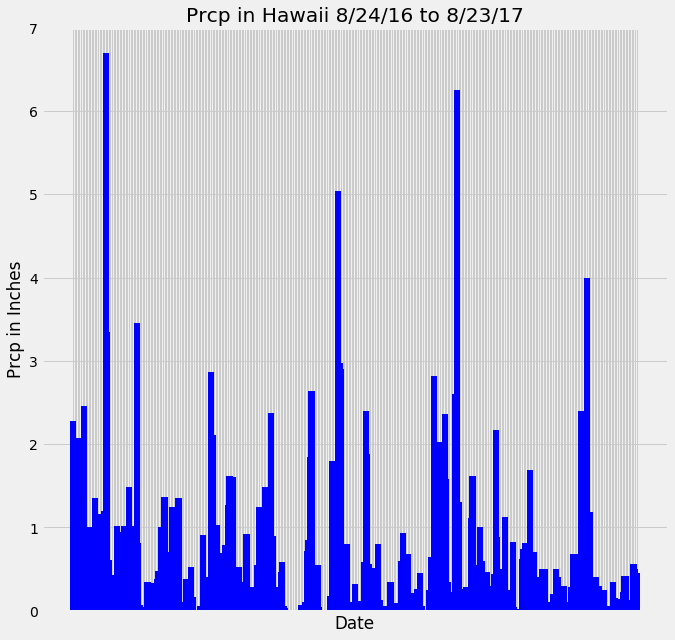

In [244]:
plt.figure(figsize=(10,10))
plt.bar(combined_df["date"], combined_df["prcp"], color='b', width=4)
plt.ylim(0, 7)
plt.tick_params(axis='x', which='both', bottom=False,top=False,labelbottom=False)
plt.title("Prcp in Hawaii 8/24/16 to 8/23/17")
plt.xlabel("Date")
plt.ylabel("Prcp in Inches");

In [245]:
# Stat summary for rain precipitation
print(prcp_df.describe())

              prcp
count  2015.000000
mean      0.176462
std       0.460288
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


In [246]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station).count()
station_count

9

In [247]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_stations = session.query(Measurement.station)

tobs = session.query(Measurement.tobs).all()



# station_df = pd.DataFrame(active_stations) 
tobs_df = pd.DataFrame(tobs)


active_df = pd.concat([station_df, tobs_df], axis=1)
count_df = active_df.groupby('station').count()

desc_df = count_df.rename(columns={'tobs': 'tobs count'}) 

desc_df.sort_values(by=['tobs count'], ascending=False)

,tobs count
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [252]:
most_active_station = session.query(Measurement.station).\
    filter(Measurement.station == "USC00519281")
    
most_active_tobs = session.query(Measurement.tobs).\
    filter(Measurement.station == "USC00519281")

In [262]:
# Lowest temp recorded for most active station
temp_df = pd.DataFrame(most_active_tobs)
temp_df.min()

tobs    54.0
dtype: float64

In [263]:
# Highest temp recorded for most active station
temp_df = pd.DataFrame(most_active_tobs)
temp_df.max()

tobs    85.0
dtype: float64

In [266]:
# Average temperature of the most active station
temp_df = pd.DataFrame(most_active_tobs)
temp_df.mean()

tobs    71.663781
dtype: float64

In [341]:
last_year_tobs = session.query(Measurement.tobs).\
    filter(Measurement.date > '2016-08-23').filter(Measurement.station == "USC00519281")

last_year_tobs_df = pd.DataFrame(last_year_tobs)
last_year_tobs_df

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


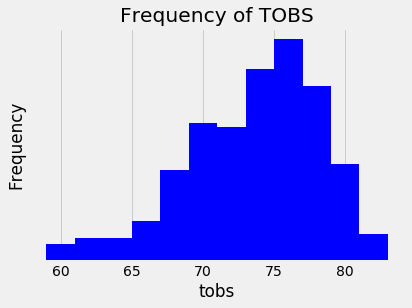

In [344]:
plt.hist(last_year_tobs_df['tobs'], bins=12, density=True, color='blue');


plt.title("Frequency of TOBS")
plt.xlabel("tobs")
plt.ylabel("Frequency")
plt.yticks([]);





In [345]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [391]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

def calc_temps(start_date, end_date):
  
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

print(calc_temps('2017-02-14', '2017-02-19'))

[(65.0, 72.48571428571428, 79.0)]


In [392]:
data = [{'Min Temp': 65.0, 'Avg Temp': 72.48571428571428, 'Max Temp':79.0}] 
  
# Creates DataFrame. 
trip_df = pd.DataFrame(data) 
  
# Print the data 
trip_df

,Min Temp,Avg Temp,Max Temp
0,65.0,72.485714,79.0


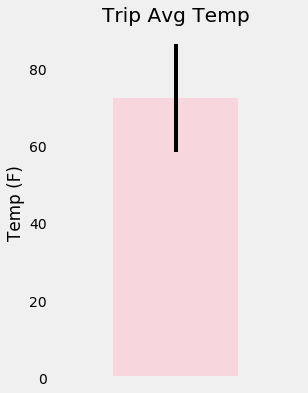

In [394]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

avg_temp = trip_df['Avg Temp']
min_max_temp = trip_df.iloc[0]['Max Temp'] - trip_df.iloc[0]['Min Temp']
avg_temp.plot(kind='bar', yerr=min_max_temp, figsize=(4,6), alpha=0.5, color='pink')
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.xticks([])
plt.grid()
plt.show() 

In [399]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


stations_prcp = session.query(Measurement.station).\
    filter(Measurement.date > '2017-02-14').filter(Measurement.date < '2017-02-19').\
    order_by(Measurement.station).all()

trip_prcp = session.query(Measurement.prcp).\
    filter(Measurement.date > '2017-02-14').filter(Measurement.date < '2017-02-19').\
    order_by(Measurement.station).all()

In [411]:
trip_stations_df = pd.DataFrame(stations_prcp) 
trip_prcp_df = pd.DataFrame(trip_prcp)

combined_trip_df = pd.concat([trip_stations_df, trip_prcp_df], axis=1)
parse_dates=['date']



total_prcp = combined_trip_df.groupby(['station']).sum()
desc_prcp = total_prcp.sort_values(by=['prcp'], ascending=False)

desc_prcp

,prcp
station,
USC00519281,0.87
USC00513117,0.80
USC00519523,0.74
USC00514830,0.68
USC00516128,0.20
USC00519397,0.07
USC00517948,0.00


In [416]:
hawaii_stations = "./Resources/hawaii_stations.csv"
hawaii_stations_df = pd.read_csv(hawaii_stations)
hawaii_stations_df

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [426]:
right_trip_df = pd.merge(hawaii_stations_df, desc_prcp,
                                 how='outer', on='station')

right_trip_df.sort_values(by=['prcp'], ascending=False)

,station,name,latitude,longitude,elevation,prcp
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.87
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.80
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.74
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.68
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.20
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.07
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.00
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,NaN
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,NaN
